<a href="https://colab.research.google.com/github/silviabarasa/Week2-CoreIP/blob/main/Silvia_Barasa_Week2_Core.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exploratory Data Analysis

# 1. Defining the Question

###a) Specifying the Data Analytic question
Financial Inclusion: Identify how we can predict which individuals are most likely to have or use a bank account across Kenya, Rwanda, Tanzania, and Uganda.

### b) Defining the Metric for Success

> Identifying which individuals are more likely to have or use the bank
-  their age groups
- their gender
- type of locality
- number of households 
- how many people in the specific countries use a bank account

### c) Understanding the context

> to solve the challenge of financial inclusion, in several regions across east Africa, i have been assigned to figure out how we can predict which individuals are most likely to have or use a bank account. Your solution will help provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda, while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.

### d) Recording the Experimental Design
- reading in the datasets
- checking the data for duplicates and missinng data
- dropping of duplicates and removal filling in of missing data values with zero
- Finding and dealing with outliers, anomalies, and missing data within the dataset.
- Performing of univariate, bivariate and multivariate analysis recording of observations.
- Implementing the solution by performing the respective analysis i.e. factor analysis, principal component analysis, and discriminant analysis.
- Challenge your solution by providing insights on how you can make improvements.

###e) Data relevance

#2. Reading the data

In [16]:
#Importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [17]:
# Loading the Data from the source i.e. csv
df = pd.read_csv('/content/Financial Dataset - 1.csv')
df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


#3. Checking the Data

In [18]:
# Determining the no. of records in our dataset
df.shape

(23524, 13)

In [19]:
# Previewing the top of our dataset
df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [20]:
# Previewing the bottom of our dataset 
df.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [21]:
# Checking whether each column has an appropriate datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


#4. External Data Source Validation

> Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.
> An example would be suppose that you're working with a dataset on the surveys ranging from 2016 to 2018 of countries. Validating such information with an external reliable resource such as  Finscope surveys in 2016,2017,2018, would be important step to providing credibility to your dataset. Have a look at the following links for an example: 
- [Link](https://fsduganda.or.ug/wp-content/uploads/2018/10/FinScope-Uganda-Survey-Report-2018.pdf).
- [link](http://www.fsdt.or.tz/wp-content/uploads/2017/09/Finscope.pdf)

#5. Tidying the Dataset

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


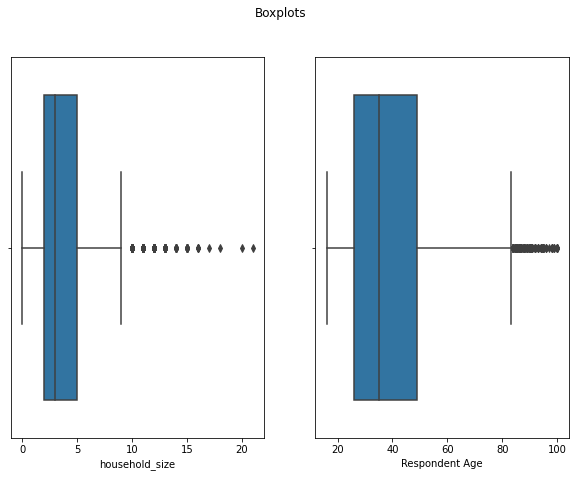

In [22]:
# Checking for Outliers
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10, 7))
fig.suptitle('Boxplots')
sns.boxplot(df['household_size'], ax=ax1)
sns.boxplot(df['Respondent Age'], ax=ax2)
plt.show()



In [23]:
# Checking for Anomalies
#
q1_1 = df['household_size'].quantile(.25)
q3_1 = df['household_size'].quantile(.75)

iqr_1 = q3_1 - q1_1


q1_2 = df['Respondent Age'].quantile(.25)
q3_2 = df['Respondent Age'].quantile(.75)
iqr_2 = q3_2 - q1_1
# Or

q1_3, q3_3 = np.percentile(df['household_size'], [25, 75]) 

iqr = q3_3 - q1_3

l_bound = q1_1 - (1.5*iqr)
u_bound = q3_3 + (1.5 * iqr)

q1_3, q3_3 = np.percentile(df['Respondent Age'], [25, 75]) 

iqr = q3_3 - q1_3

l_bound = q1_1 - (1.5*iqr)
u_bound = q3_3 + (1.5 * iqr)
print(iqr_1, iqr)
print(iqr_2, iqr)

3.0 nan
47.0 nan


In [24]:
# Finding if there are any duplicates
df.duplicated().sum()

0

In [25]:
# Identifying the Missing Data
# Checking how many missing values there are across each column
df.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

In [26]:
# Dealing with the Missing Data
#
df.dropna(inplace=True)

In [27]:
#checking if null values were dropped
df.isnull().sum()

country                   0
year                      0
uniqueid                  0
Has a Bank account        0
Type of Location          0
Cell Phone Access         0
household_size            0
Respondent Age            0
gender_of_respondent      0
The relathip with head    0
marital_status            0
Level of Educuation       0
Type of Job               0
dtype: int64

In [28]:
#dropping years greater than 2018
df.drop(df[df.year > 2018].index,inplace=True)

In [29]:
# drop columns
to_drop = ['uniqueid','The relathip with head', 'year']
df.drop(to_drop, axis=1, inplace=True)

In [30]:
#Renaming the level of education column
df.rename(columns={'Level of Educuation':'Education'},inplace=True)

In [31]:
#changing column names to lower case and placing underscore to make the column names be more presentable
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
df.head()

,country,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,marital_status,education,type_of_job
0,Kenya,Yes,Rural,Yes,3.0,24.0,Female,Married/Living together,Secondary education,Self employed
1,Kenya,No,Rural,No,5.0,70.0,Female,Widowed,No formal education,Government Dependent
2,Kenya,Yes,Urban,Yes,5.0,26.0,Male,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,No,Rural,Yes,5.0,34.0,Female,Married/Living together,Primary education,Formally employed Private
4,Kenya,No,Urban,No,8.0,26.0,Male,Single/Never Married,Primary education,Informally employed


# 6. Exploratory Analysis

##6.1 Univariate Analysis

#### 6.1.1 Categorical variables

***##Frequency tables***

In [32]:
#Frequency table of gender of respondent
da = df.gender_of_respondent.value_counts()
print("The frequency of gender of respondent is: \n", da)
print('\n')
#frequency table of those with a bank account
da1 = df.has_a_bank_account.value_counts()
print("The frequency of has a bank account is: \n", da1)
print('\n')
da2 = df.type_of_location.value_counts()
print("The frequency of type of location is: \n", da2)
print('\n')
da3 = df.country.value_counts()
print("The frequency of country is: \n", da3)
print('\n')
da4 = df.marital_status.value_counts()
print("The frequency of the marital status is: \n", da4)
print('\n')
da5 = df.education.value_counts()
print("The frequency of education level is: \n", da5)
print('\n')

The frequency of gender of respondent is: 
 Female    13766
Male       9574
Name: gender_of_respondent, dtype: int64


The frequency of has a bank account is: 
 No     20044
Yes     3296
Name: has_a_bank_account, dtype: int64


The frequency of type of location is: 
 Rural    14263
Urban     9077
Name: type_of_location, dtype: int64


The frequency of country is: 
 Rwanda      8683
Tanzania    6500
Kenya       6062
Uganda      2095
Name: country, dtype: int64


The frequency of the marital status is: 
 Married/Living together    10698
Single/Never Married        7902
Widowed                     2683
Divorced/Seperated          2049
Dont know                      8
Name: marital_status, dtype: int64


The frequency of education level is: 
 Primary education                  12688
No formal education                 4467
Secondary education                 4206
Tertiary education                  1143
Vocational/Specialised training      801
6                                     27
Other

***##Bar charts and histograms***

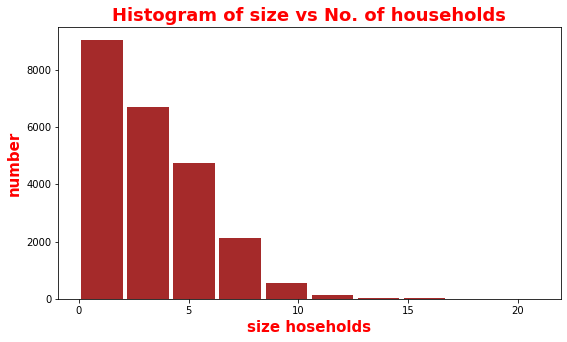

In [33]:
#Histogram of household size
household = df['household_size']
plt.figure(figsize=(9,5))
plt.hist(household, bins=10, histtype='bar', rwidth=0.9, color='brown')
plt.xlabel('size hoseholds', fontweight='bold', color='red', fontsize=15)
plt.ylabel('number', fontweight='bold', color='red', fontsize=15)
plt.title('Histogram of size vs No. of households', fontweight='bold', color='red', fontsize=18)
plt.show()

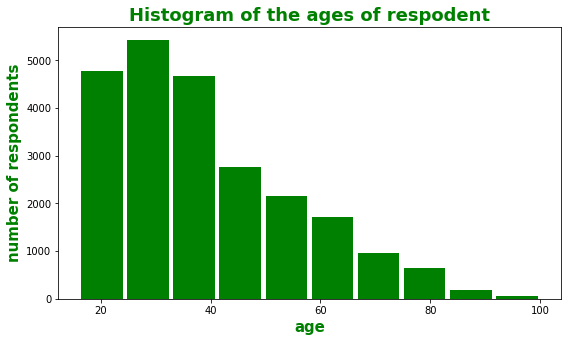

In [34]:
#Histogram of age of respondent
household = df['respondent_age']
plt.figure(figsize=(9,5))
plt.hist(household, bins=10, histtype='bar', rwidth=0.9, color='green')
plt.xlabel('age', fontweight='bold', color='green', fontsize=15)
plt.ylabel('number of respondents', fontweight='bold', color='green', fontsize=15)
plt.title('Histogram of the ages of respodent', fontweight='bold', color='green', fontsize=18, )
plt.show()

***##pie charts***

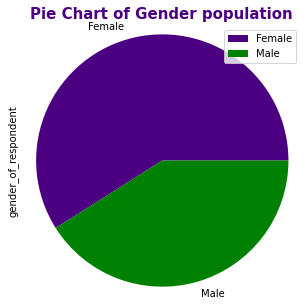

In [35]:
#pie chart for gender 
gender= df['gender_of_respondent'].value_counts().plot(kind='pie',colors=['indigo','green'])
fig=plt.gcf()
fig.set_size_inches(5,5)
#plt.pie(gender,labels= gender,colors=colors,autopct = '%1.1f%%', shadow = True, startangle = 140)
plt.axis('equal')
plt.legend(loc='upper right')
plt.title('Pie Chart of Gender population', fontweight='bold', fontsize=15, color='indigo')
plt.show()

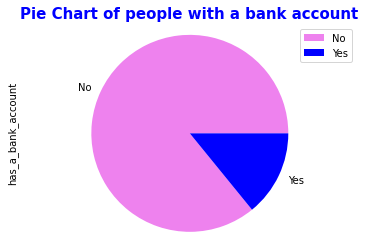

In [36]:
#pie chart for people with a bank account 
gender= df['has_a_bank_account'].value_counts().plot(kind='pie',colors=['violet','blue'])
#plt.pie(gender,labels= gender,colors=colors,autopct = '%1.1f%%', shadow = True, startangle = 140)
plt.axis('equal')
plt.legend(loc='upper right')
plt.title('Pie Chart of people with a bank account', fontweight='bold', fontsize=15, color='blue')
plt.show()

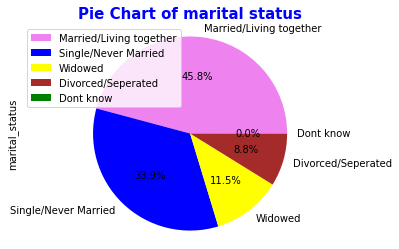

In [37]:
#pie chart for marital status 
gender= df['marital_status'].value_counts().plot(kind='pie', startangle=360, autopct='%1.1f%%',colors=['violet','blue', 'yellow', 'brown', 'green'])
#plt.pie(gender,labels= gender,colors=colors,autopct = '%1.1f%%', shadow = True, startangle = 140)
plt.axis('equal')
plt.legend(loc='upper left')
plt.title('Pie Chart of marital status', fontweight='bold', fontsize=15, color='blue')
plt.show()

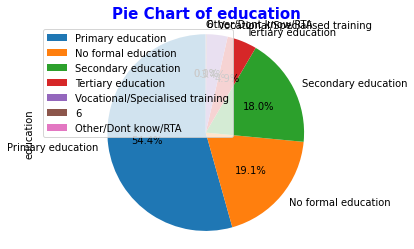

In [38]:
#pie chart for marital status 
gender= df['education'].value_counts().plot(kind='pie', startangle=90, autopct='%1.1f%%')
#plt.pie(gender,labels= gender,colors=colors,autopct = '%1.1f%%', shadow = True, startangle = 140)
plt.axis('equal')
plt.legend(loc='upper left')
plt.title('Pie Chart of education', fontweight='bold', fontsize=15, color='blue')
plt.show()

#### 6.1.2 Numerical Variables

***##Measures of central tendancy***

In [39]:
#mean, median and mode for respondent age
d1 = df['respondent_age'].mean()
print("The mean for respondent age is: \n", d1)
print('\n')
d2 = df['respondent_age'].median()
print("The median for respondent age is: \n", d2)
print('\n')
d3 = df['respondent_age'].mode()
print("The mode for respondent age is: \n", d3)
print('\n')

The mean for respondent age is: 
 38.80706940874036


The median for respondent age is: 
 35.0


The mode for respondent age is: 
 0    30.0
dtype: float64




In [40]:
#The mean,median,mode for household size
d1 = df['household_size'].mean()
print("The mean for household size is: \n", d1)
print('\n')
d2 = df['household_size'].median()
print("The median for household size is: \n", d2)
print('\n')
d3 = df['household_size'].mode()
print("The mode for household size  is: \n", d3)
print('\n')

The mean for household size is: 
 3.688560411311054


The median for household size is: 
 3.0


The mode for household size  is: 
 0    2.0
dtype: float64




***##Measures of dispersion***

In [41]:
#Standard deviation and variance of age of respondents
d1 = df['respondent_age'].std()
print("The standard deviation for respondent age is: \n", d1)
print('\n')
d2 = df['respondent_age'].var()
print("The variance for respondent age is: \n", d2)
print('\n')

The standard deviation for respondent age is: 
 16.519904564514412


The variance for respondent age is: 
 272.90724682066417




In [42]:
#Range for respondent age
max = df['respondent_age'].max()
min = df['respondent_age'].min()
range = max - min
range

84.0

In [43]:
#Standard deviation and variance of household size
d1 = df['household_size'].std()
print("The standard deviation for household size is: \n", d1)
print('\n')
d2 = df['household_size'].var()
print("The variance for household size is: \n", d2)
print('\n')

The standard deviation for household size is: 
 2.2812745975350435


The variance for household size is: 
 5.204213789358675




In [44]:
#Range for household size
max = df['household_size'].max()
min = df['household_size'].min()
range = max - min
range

21.0

***##Quantiles***

In [45]:
#The quatiles of respondent age
df['respondent_age'].quantile([0.25,0.5,0.75])

0.25    26.0
0.50    35.0
0.75    49.0
Name: respondent_age, dtype: float64

In [46]:
#The quatiles of respondent age
df['household_size'].quantile([0.25,0.5,0.75])

0.25    2.0
0.50    3.0
0.75    5.0
Name: household_size, dtype: float64

***##Skewness***

In [47]:
#Skeweness of respondent age
age_df = df['respondent_age'].skew()
print(age_df)
if age_df > 0:
  print('The distribution is positively skewed')
elif age_df < 0:
    print('The distribution is negatively skewed')
else:
    print(' The distribution is Symmetric')

0.8406145812311228
The distribution is positively skewed


In [48]:
#The skewness of household size
household_df = df['household_size'].skew()
print(household_df)
if age_df > 0:
  print('The distribution is positively skewed')
elif age_df < 0:
    print('The distribution is negatively skewed')
else:
    print(' The distribution is Symmetric')

0.9741827150450616
The distribution is positively skewed


***##Kurtosis***

In [49]:
#Kurtosis for respondent age
age_df = df['respondent_age'].kurt()
print(age_df)
if age_df > 0:
  print('Leptokurtic')
elif age_df < 0:
    print('Platykurtic')
else:
    print('Mesokurtic')

0.09826807013177241
Leptokurtic


In [50]:
#Kurtosis for household size
household_df = df['household_size'].kurt()
print(household_df)
if household_df > 0:
  print('Leptokurtic')
elif household_df < 0:
    print('Platykurtic')
else:
    print('Mesokurtic')

1.1538357462528523
Leptokurtic


In [51]:
#summary statistics
a = df['respondent_age'].describe()
print("The summary statistics for age of respondent is: \n", a)
print('\n')
b = df['household_size'].describe()
print("The summary statistics for household size is: \n", b)
print('\n')

The summary statistics for age of respondent is: 
 count    23340.000000
mean        38.807069
std         16.519905
min         16.000000
25%         26.000000
50%         35.000000
75%         49.000000
max        100.000000
Name: respondent_age, dtype: float64


The summary statistics for household size is: 
 count    23340.000000
mean         3.688560
std          2.281275
min          0.000000
25%          2.000000
50%          3.000000
75%          5.000000
max         21.000000
Name: household_size, dtype: float64




***##visualization techniques***

Ploting the univariate summaries and recording our observations

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


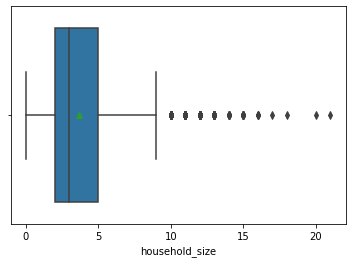

In [52]:
#Box plot for household size
## boxplot
sns.boxplot(df['household_size'], showmeans=True)

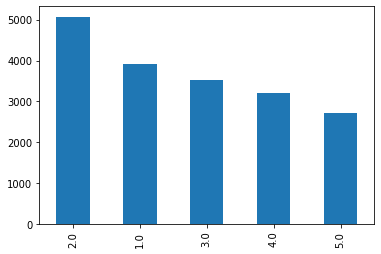

In [53]:
#Bar chart for household size
df['household_size'].value_counts().head().plot.bar()

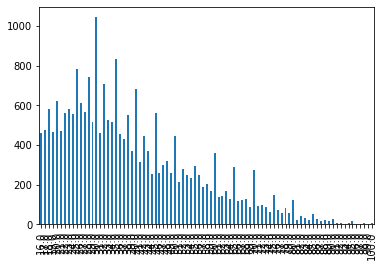

In [54]:
#Bar chart for respondent age
df['respondent_age'].value_counts().sort_index().plot.bar()

Recommendations


> While from the data there is no assurity that the household size detemined whether or not individuals had bank accounts across Kenya, Rwanda, Tanzania, and Uganda, it is clear that most of the older individuals had bank accounts.
i would recommend that children and the youth be educated on the importance of bank accounts.

##6.2 Bivariate analysis

### 6.2.1 Numerical and Numerical

***##Scatter plots***

In [55]:
#Grouping our househole size according to the respondent age
scatter=df.groupby('respondent_age')['household_size'].count().reset_index(name='total household_size')
scatter

,respondent_age,total household_size
0,16.0,459
1,17.0,474
2,18.0,583
3,19.0,466
4,20.0,622
...,...,...
80,96.0,3
81,97.0,1
82,98.0,6
83,99.0,2


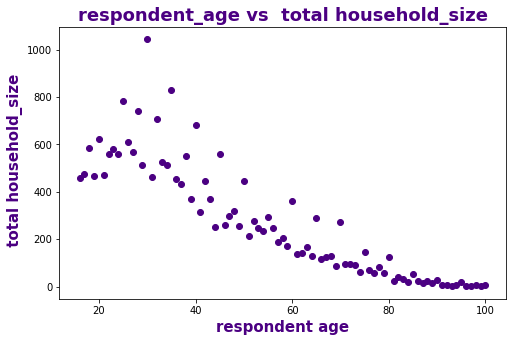

In [56]:

# Plotting our scatterplot
plt.figure(figsize=(8,5))
plt.scatter(scatter["respondent_age"] , scatter["total household_size"], color='indigo')
# Giving our scatterplot a title
plt.title('respondent_age vs  total household_size', fontweight='bold', fontsize=18, color='indigo')

# Labelling our x axis
plt.xlabel('respondent age', fontweight='bold', fontsize=15, color='indigo')

# Labelling our y axis
plt.ylabel(' total household_size', fontweight='bold', fontsize=15, color='indigo')

# Displaying our scatterplot
plt.show()
#there is a negative relation since as age of respondent increases the total household size decreases 

***##Correlation***

In [57]:
# Calculating the pearson coefficient
pearson_coeff = df["respondent_age"].corr(df["household_size"], method="pearson") 
print(pearson_coeff)

# Checking whether you have to define the pearson
coeff = df["respondent_age"].corr(df["household_size"]) 
print(coeff)
# The respondent age and household size have a very weak negative correlation

-0.11967115234154871
-0.11967115234154871


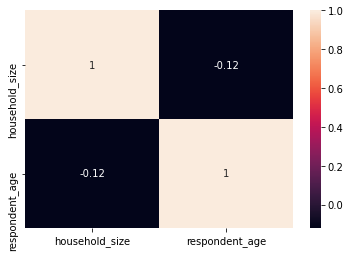

In [58]:
#  showing correlation on a heatmap
sns.heatmap(df.corr(),annot=True)
plt.show()

### 6.2.2 Categorical and categorical

***##Stacked column chart***

Text(0, 0.5, 'no. of people with a bank account')

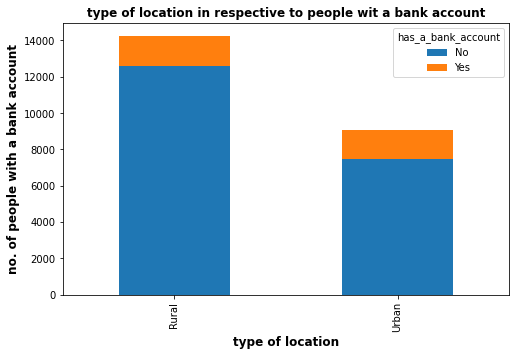

In [59]:
#Stacked bar chart of location with people with a bank account
pd.crosstab(df['type_of_location'],df['has_a_bank_account']).plot(kind="bar",stacked=True,  figsize=(8,5))
plt.title('type of location in respective to people wit a bank account', fontweight='bold', fontsize=12)
plt.xlabel('type of location', fontweight='bold', fontsize=12)
plt.ylabel('no. of people with a bank account', fontweight='bold', fontsize=12)

Text(0, 0.5, 'number')

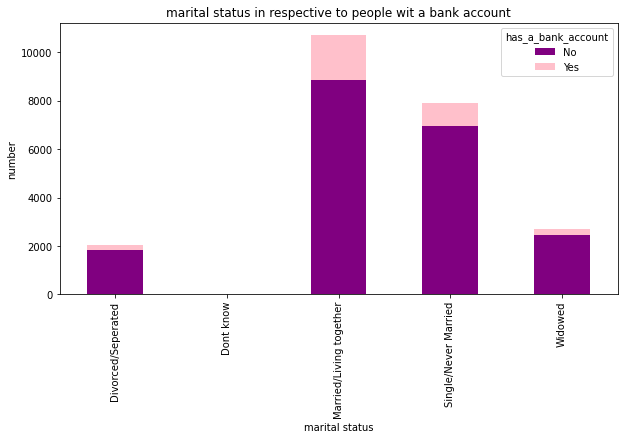

In [60]:
# Bar chart for marital status and people with a bank account
pd.crosstab(df['marital_status'],df['has_a_bank_account']).plot(kind="bar",stacked=True, color= ['purple', 'pink'], figsize=(10,5))
plt.title('marital status in respective to people wit a bank account')
plt.xlabel('marital status')
plt.ylabel('number')

Text(0, 0.5, 'number')

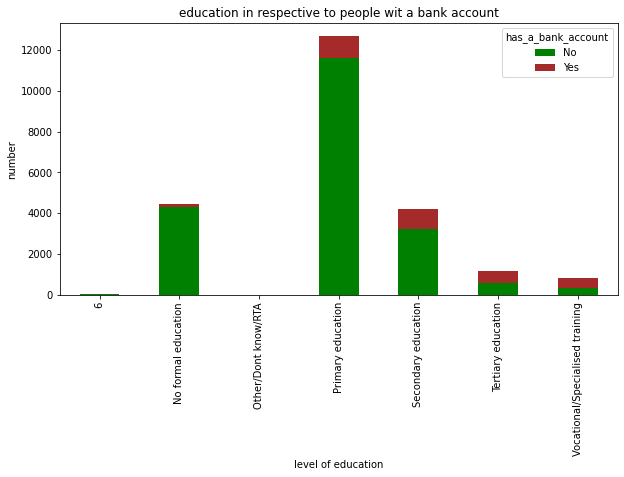

In [61]:
#Bar chart for education level and people with a bank account
pd.crosstab(df['education'],df['has_a_bank_account']).plot(kind="bar",stacked=True, color= ['green', 'brown'],  figsize=(10,5))
plt.title('education in respective to people wit a bank account')
plt.xlabel('level of education')
plt.ylabel('number')

Text(0, 0.5, 'number')

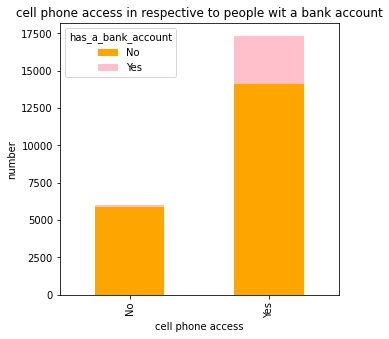

In [62]:
#Bar chart for people with cell phone access inrespective to a bank account
pd.crosstab(df['cell_phone_access'],df['has_a_bank_account']).plot(kind="bar",stacked=True, color= ['orange', 'pink'],  figsize=(5,5))
plt.title('cell phone access in respective to people wit a bank account')
plt.xlabel('cell phone access')
plt.ylabel('number')

Text(0, 0.5, 'number')

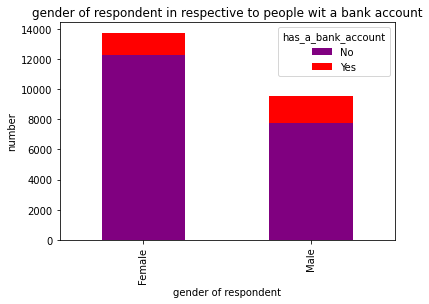

In [63]:
#Bar chart for gender in relation to people with a bank account
pd.crosstab(df['gender_of_respondent'],df['has_a_bank_account']).plot(kind="bar",stacked=True, color= ['purple', 'red'])
plt.title('gender of respondent in respective to people wit a bank account')
plt.xlabel('gender of respondent')
plt.ylabel('number')

Text(0, 0.5, 'number')

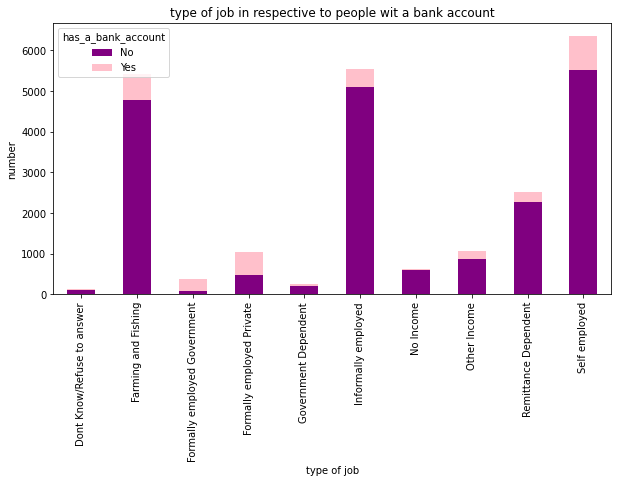

In [64]:
#Bar chart for type of job in relation to people with a bank account
pd.crosstab(df['type_of_job'],df['has_a_bank_account']).plot(kind="bar",stacked=True, color= ['purple', 'pink'],  figsize=(10,5))
plt.title('type of job in respective to people wit a bank account')
plt.xlabel('type of job')
plt.ylabel('number')

### 6.2.3 Categorical and Numerical

***##Z test***

In [66]:
from scipy import stats

In [67]:
#Z Score for respondent age
age = df['respondent_age']
from scipy.stats import zscore
stats.zscore(age)

array([-0.89633609,  1.88824328, -0.77526742, ..., -0.71473308,
       -0.53313008, -1.13847342])

In [68]:
#Z Score for household size
household = df['household_size']
from scipy.stats import zscore
stats.zscore(household)

array([-0.30183791,  0.57488374,  0.57488374, ...,  0.57488374,
        1.4516054 ,  2.76668789])

***##T test***

In [69]:
#Installing researchpy library
pip install researchpy

In [70]:
#Grouping people with a bank account with gender of respondent
stat=df.groupby('has_a_bank_account')['gender_of_respondent'].value_counts().reset_index(name='Count per gender')
stat

,has_a_bank_account,gender_of_respondent,Count per gender
0,No,Female,12286
1,No,Male,7758
2,Yes,Male,1816
3,Yes,Female,1480


In [71]:
#Locating a people who responded yes to having a bank account
yes=stat.loc[(stat['has_a_bank_account'] == 'Yes')]
yes

,has_a_bank_account,gender_of_respondent,Count per gender
2,Yes,Male,1816
3,Yes,Female,1480


In [72]:
no=stat.loc[stat['has_a_bank_account'] == "No"]

In [73]:
#Calculating t test
from scipy.stats import ttest_ind
t_stat,p = ttest_ind(yes['Count per gender'],no['Count per gender'])
print(f't={t_stat}, p={p}')

t=-3.688621726795465, p=0.06627434989683603


> 

> In places located in rural areas,many respondents had reported to be having no bank account.We also noticed  many self-employed people don't have bank accounts. Similarly,many respondents with no cell phone access reported to be having no bank account.
The following are to be done to improve the situation ;
- Educate people living in rural areas on the importance of having a bank account and even educate them how to use the bank account.
- Generally, create awarenesss on the importance of having a bank account to all people across all ages.

##6.3 Multivariate Analysis

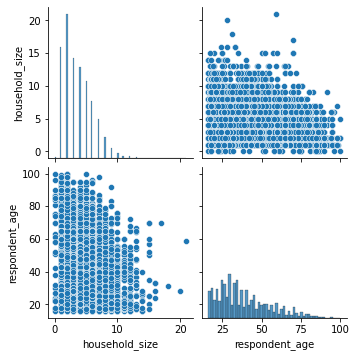

In [74]:
#Plotting a pair plot
sns.pairplot(df)
plt.show()

# 7. Implementing the Solution

**Data Reduction Techniques**

###7.1. Principal component analysis

In [75]:
df.head(1)

,country,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,marital_status,education,type_of_job
0,Kenya,Yes,Rural,Yes,3.0,24.0,Female,Married/Living together,Secondary education,Self employed


In [76]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df[['household_size', 'respondent_age']])
scaled_data = scaler.transform(df[['household_size', 'respondent_age']])

In [77]:
scaled_data = pd.DataFrame(scaled_data)

In [78]:
df2 = scaled_data.fillna(0)
df2.head()

,0,1
0,-0.301838,-0.896336
1,0.574884,1.888243
2,0.574884,-0.775267
3,0.574884,-0.290993
4,1.889966,-0.775267


In [79]:
from sklearn.decomposition import PCA
logmodel = PCA(n_components=2)
logmodel.fit(df2)
pca_x = logmodel.transform(df2)

In [80]:
df2.shape

(23340, 2)

In [81]:
pca_x.shape

(23340, 2)

In [82]:
df3 = pd.DataFrame(logmodel.components_, columns = ['household_size', 'respondent_age'])

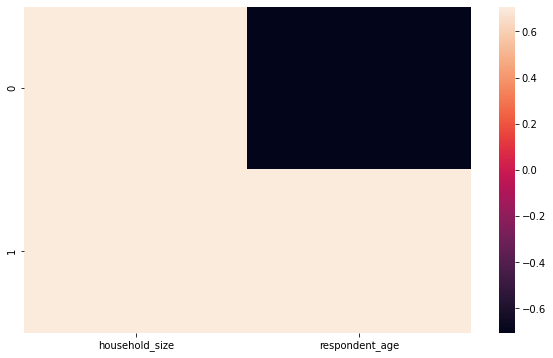

In [83]:
plt.figure(figsize=(10,6))
sns.heatmap(df3)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Principle Component2 ')

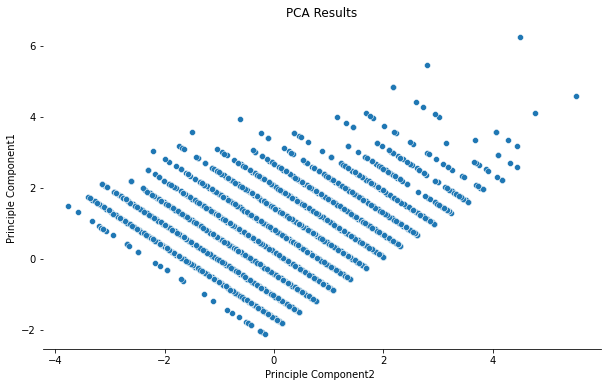

In [84]:
plt.figure(figsize=(10,6))
ty=sns.scatterplot(pca_x[:,0], pca_x[:,1])
sns.despine(left=True)
ty.set_title('PCA Results')
ty.set_ylabel('Principle Component1 ')
ty.set_xlabel('Principle Component2 ')

In [85]:
pca_x

array([[ 0.42037369, -0.84723696],
       [-0.92868544,  1.74169382],
       [ 0.95470104, -0.14169265],
       ...,
       [ 0.91189681, -0.09888842],
       [ 1.40341992,  0.64946013],
       [ 2.76136605,  1.15132149]])

#8. Challenging the solution

>The easy solution is nice because it is, well, easy, but you should never allow those results to hold the day. You should always be thinking of ways to challenge the results, especially if those results comport with your prior expectation.

> In places located in rural areas,many respondents had reported to be having no bank account.We also noticed  many self-employed people don't have bank accounts. Similarly,many respondents with no cell phone access reported to be having no bank account.
The following are to be done to improve the situation ;
- Educate people living in rural areas on the importance of having a bank account and even educate them how to use the bank account.
- Generally, create awarenesss on the importance of having a bank account to all people across all ages.

In [90]:
df2.shape

(23340, 2)

In [ ]:
# Reviewing the Solution 
N = 23340
N <- nrow(df)
idx <- sample(N, N, replace = TRUE)
df4 <- df[idx, ]

#8. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.

###a) Did we have the right Data?

> No. Since the data in insufficient to predict which individuals are most likely to have or use a bank account.

### b). Do we need other data to answer our question?

> Yes. Having data indicating the income of people will be of importance since we will be able to know how much they earn and in relation to their incomes we will be able to predict if they are most likely to have or use a bank account

### c). Did we have the right question?

> yes, Since access to bank accounts has been regarded as an indicator of financial inclusion.